# Predictions based on first vector - v1

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Features:

* B365H
* B365D
* B365A

* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth


In [2]:
model_data = pd.read_csv('learning_vectors/v01/version01-bet365FIFA.csv', sep=',')
model_data = model_data.set_index(['Match_id'])

model_data = model_data.sort_values(['League_id', 'Date'])
model_data.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                      'B365H', 'B365D', 'B365A',
                      'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                      'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

print(model_data.shape)
# model_data.head()


(6080, 26)


In [3]:
#Check for nulls in data
model_data.isnull().sum()
print(model_data.isnull().any().any())


False


## Different algorithms comparison:

In [4]:
features = ['B365H', 'B365D', 'B365A',
            'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
            'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

ALGS = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

print(model_data[features].shape)
model_data[features].head()


(6080, 19)


,B365H,B365D,B365A,H_Speed,H_Pass,H_Shoot,H_Pressure,H_chPass,H_chCross,H_dAggr,H_dWidth,A_Speed,A_Pass,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth
Match_id,,,,,,,,,,,,,,,,,,,
1730,1.20,6.5,15.00,66,30,35,30,30,45,40,50,65,40,55,70,70,70,70,70
1731,5.50,3.6,1.67,60,70,55,35,70,70,70,35,50,35,70,40,50,60,60,40
1732,1.91,3.4,4.20,58,30,50,30,31,70,70,30,70,70,50,35,70,70,70,35
1734,2.00,3.3,4.00,60,65,45,40,60,70,70,40,55,70,55,45,60,70,70,45
1735,3.20,3.4,2.25,70,70,50,30,70,70,70,30,70,50,50,50,50,65,50,50


### Basic comparison:

Alg/res.mean/res.std
LR: 0.543750 (0.011324)
LDA: 0.537664 (0.015375)
KNN: 0.461184 (0.005602)
CART: 0.436513 (0.011476)
NB: 0.450987 (0.008483)
SVM: 0.472204 (0.012311)


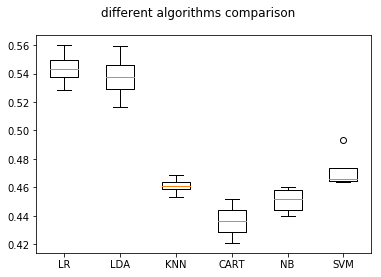

In [5]:
X = model_data[features]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


### Basic comparison with preprocessing:

Alg/res.mean/res.std
LR: 0.543421 (0.005405)
LDA: 0.537336 (0.008481)
KNN: 0.473026 (0.007101)
CART: 0.436513 (0.012938)
NB: 0.449836 (0.011313)
SVM: 0.537336 (0.008831)


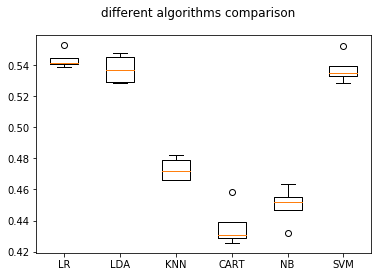

In [6]:
X = preprocessing.scale(model_data[features])
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## Other model comparisons:

Alg/res.mean/res.std
LR: 0.545230 (0.018382)
LDA: 0.539145 (0.004474)
KNN: 0.489309 (0.011342)
CART: 0.489803 (0.009169)
NB: 0.428125 (0.012311)
SVM: 0.545066 (0.010825)


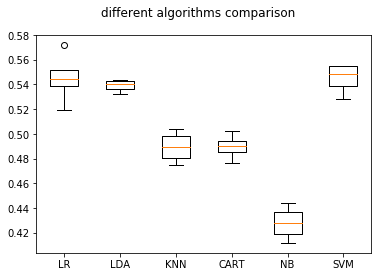

In [7]:
features_B365 = ['B365H', 'B365D', 'B365A']

X = model_data[features_B365]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Alg/res.mean/res.std
LR: 0.481414 (0.008843)
LDA: 0.483059 (0.011484)
KNN: 0.462993 (0.016833)
CART: 0.423849 (0.010520)
NB: 0.472533 (0.008156)
SVM: 0.467105 (0.007854)


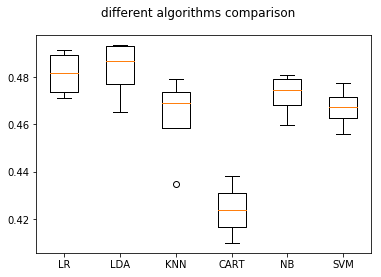

In [8]:
features_noB365 = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                   'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth']

X = model_data[features_noB365]
y = model_data['Result']

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in ALGS:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
